# MLToolKit Example
Create Date: July 20, 2019; Last Update: December 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolKit [v0.1.10]

MLToolKit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```

## Load Data

In [1]:
import mltk

# Load dataset
Data_ = mltk.read_data_csv(file=r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data_, replace='')
# Add ID column
Data_ = mltk.add_identity_column(Data_, id_label='ID', start=1, increment=1)

mltk==0.1.11

Some functions of MLToolKit depends on number of Open Source Python Libraries such as
- Data Manipulation : Pandas
- Machine Learning: Statsmodels, Scikit-learn, Catboost
- Deep Learning: Tensorflow, 
- Model Interpretability: Shap, Lime
- Server Framework: Flask
- Text Processing: BeautifulSoup, TextLab
- Database Connectivity: SQLAlchemy, PyODBC
MLToolkit Project acknowledge the creators and contributors of the above libraries for their contribution to the Open Source Community.

read time is 0.087 s
read 32,561 records


## JSON-MLS input to build machine learning model

In [2]:
model_building_setup_dict = """
{
    "variables_setup_dict" : {
        "setting":"model",

        "variables": {            
                "category_variables" : ["sex", "race", "occupation", "workclass", "maritalstatus", "relationship"],
                "binary_variables": [],
                "target_variable":"HighIncome"
        },

        "preprocess_tasks": [
            {
                "type": "target",
                "out_type":"bin",
                "include": false,
                "operation": "condition",
                "variables": {
                    "source": null,
                    "destination": "HighIncome"
                },
                "parameters": {
                    "condition_str": "income=='>50K'",
                    "default": 0,
                    "null": 0
                }
            },
            {
                "type": "transform",
                "out_type":"cnt",
                "include": false,
                "operation": "normalize",
                "variables": {
                    "source": "age",
                    "destination": "normalizedage"
                },
                "parameters": {
                    "method": "zscore"
                }
            },
            {
                "type": "category_merge",
                "out_type":"cat",
                "include": true,
                "operation": "catmerge",
                "variables": {
                    "source": "maritalstatus",
                    "destination": "maritalstatus"
                },
                "parameters": {
                    "group_value": "Married",
                    "values": [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse" ]
                }
            },
            {
                "type": "entity",
                "out_type":"cat",
                "include": true,
                "operation": "dictionary",
                "variables": {
                    "source": "nativecountry",
                    "destination": "nativecountryGRP"
                },
                "parameters": {
                    "match_type": null,
                    "dictionary": [
                        {
                            "entity": "USA",
                            "values": [ "United-States" ],
                            "case": true
                        },
                        {
                            "entity": "Canada",
                            "values": [ "Canada" ],
                            "case": true
                        },
                        {
                            "entity": "OtherAmericas",
                            "values": [ "South", "Mexico", "Trinadad&Tobago", "Jamaica", "Peru", "Nicaragua", "Dominican-Republic", "Haiti", "Ecuador", "El-Salvador", "Columbia", "Honduras", "Guatemala", "Puerto-Rico", "Cuba", "Outlying-US(Guam-USVI-etc)"],
                            "case": true
                        },
                        {
                            "entity": "Europe-Med",
                            "values": [ "Greece", "Holand-Netherlands", "Poland", "Iran", "England", "Germany", "Italy", "Ireland", "Hungary", "France", "Yugoslavia", "Scotland", "Portugal" ],
                            "case": true
                        },
                        {
                            "entity": "Asia",
                            "values": [ "Vietnam", "China", "Taiwan", "India", "Philippines", "Japan", "Hong", "Cambodia", "Laos", "Thailand" ],
                            "case": true
                        },
                        {
                            "entity": "Other",
                            "values": [ "?" ],
                            "case": true
                        }
                    ],
                    "null": "NA",
                    "default": "OTHER"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "age",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "30", "40", "50", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "educationnum",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "1", "5", "8", "9", "12", "16" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            },
            {
                "type": "category",
                "out_type":"cat",
                "include": true,
                "operation": "bucket",
                "variables": {
                    "source": "hoursperweek",
                    "destination": null
                },
                "parameters": {
                    "labels_str": [ "0", "20", "35", "40", "60", "INF" ],
                    "right_inclusive": true,
                    "default": "OTHER",
                    "null": "NA"
                }
            }
        ]
    },

    "model_setup_dict": {
        "sample_split": [0.6, 0.2, 0.2],

        "sample_attributes" : {
            "SampleDescription":"Adult Census Income Dataset",
            "NumClasses":2,
            "DataFormat":"table",
            "ClassLabelsMap":{"<=50K":0, ">50K":1},
            "RecordIdentifiers": ["ID"],
            "ModelDataStats":null
        },

        "score_parameters" : {
            "Edges":[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            "Threshold":0.5,
            "Quantiles":10,
            "TargetClass": ">50K",
            "ScoreVariable":"Probability",
            "ScoreLabel":"Score",
            "QuantileLabel":"Quantile",
            "PredictedLabel":"Predicted"
        },

        "model_attributes" : {
            "ModelID": null,   
            "ModelType": "classification",
            "ModelName": "IncomeLevel",
            "Version":"0.1"
        },

        "model_parameters" : {
            "MLAlgorithm":"LGR", 
            "MaxIterations":100
        },

        "model_outputs" : {
            "return_model_object":true, 
            "show_results":false, 
            "show_plot":false
        },

        "target_variable": "HighIncome",

        "model_variables" : [
            "race_Amer-Indian-Eskimo",
            "race_Asian-Pac-Islander",
            "race_Black",
            "race_Other",
            "occupation_Adm-clerical",
            "occupation_Craft-repair",
            "occupation_Exec-managerial",
            "occupation_Farming-fishing",
            "occupation_Handlers-cleaners",
            "occupation_Machine-op-inspct",
            "occupation_Other-service",
            "occupation_Prof-specialty",
            "occupation_Protective-serv",
            "occupation_Sales",
            "occupation_Tech-support",
            "maritalstatus_Divorced",
            "maritalstatus_Married",
            "maritalstatus_Never-married",
            "educationnumGRP_1_(1,5]",
            "educationnumGRP_2_(5,8]",
            "educationnumGRP_3_(8,9]",
            "educationnumGRP_4_(9,12]",
            "relationship_Husband",
            "relationship_Not-in-family",
            "relationship_Other-relative",
            "relationship_Own-child",
            "relationship_Unmarried",
            "ageGRP_2_(20,30]",
            "ageGRP_3_(30,40]",
            "ageGRP_4_(40,50]",
            "ageGRP_5_(50,60]",
            "sex_Female",
            "nativecountryGRP_Asia",
            "nativecountryGRP_Canada",
            "nativecountryGRP_Europe-Med",
            "nativecountryGRP_Other",
            "nativecountryGRP_OtherAmericas",
            "workclass_Federal-gov",
            "workclass_Local-gov",
            "workclass_Private",
            "workclass_Self-emp-inc",
            "workclass_Self-emp-not-inc",
            "workclass_State-gov",
            "hoursperweekGRP_1_(0,20]",
            "hoursperweekGRP_2_(20,35]",
            "hoursperweekGRP_3_(35,40]",
            "hoursperweekGRP_4_(40,60]"
        ]
    }
}
"""

## Build Model

In [3]:
# build model using JSON-MLS
MLModelObject, variables_setup_dict  = mltk.build_ml_model_from_data_task(Data_, model_building_setup_dict, return_script=True)

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]
Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20200212195306', 'ModelType': 'classification', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'MLTKVersion': '0.1.11', 'BuiltTime': '20200212195306', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100, 'NumClasses': 2}
Adult Census Income Dataset
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Threshold': 0.5, 'Quantiles': 10, 'TargetClass': '>50K', 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile', 'PredictedLabel': 'Predicted'}
Optimization terminated successfully.
         Current function value: 0.343935
         Iterations 9
INCOMELEVELLGR20200212195306
ROC AUC:  0.8907408624395736
PRC AUC:  0.7142964435794291


## Deploy

### JSON-MLS for deployment

In [4]:
import json
print(json.dumps(variables_setup_dict, indent=4))

{
    "setting": "score",
    "variables": {
        "category_variables": [
            "sex",
            "race",
            "occupation",
            "workclass",
            "maritalstatus",
            "relationship"
        ],
        "binary_variables": [],
        "target_variable": "HighIncome"
    },
    "preprocess_tasks": [
        {
            "type": "category_merge",
            "out_type": "cat",
            "include": true,
            "operation": "catmerge",
            "variables": {
                "source": "maritalstatus",
                "destination": "maritalstatus"
            },
            "parameters": {
                "group_value": "Married",
                "values": [
                    "Married-civ-spouse",
                    "Married-spouse-absent",
                    "Married-AF-spouse"
                ]
            }
        },
        {
            "type": "entity",
            "out_type": "cat",
            "include": true,
            "ope

In [5]:
TestInput = """
{
      "ID": "A001",
      "age": 32,
      "workclass": "Private",
      "education": "Doctorate",
      "education-num": 16,
      "marital-status": "Married-civ-spouse",
      "occupation": "Prof-specialty",
      "relationship": "Husband",
      "race": "Asian-Pac-Islander",
      "sex": "Male",
      "capital-gain": 0,
      "capital-loss": 0,
      "hours-per-week": 40,
      "native-country": "?"
}
"""

In [6]:
def ETL(DataFrame, variables_setup_dict=None):
    
    # Add ID column
    DataFrame = mltk.add_identity_column(DataFrame, id_label='ID', start=1, increment=1)

    # Clean column names
    DataFrame = mltk.clean_column_names(DataFrame, replace='')
    input_columns = list(DataFrame.columns)
    
    try:
        DataFrame, categoryVariables, binaryVariables, targetVariable = mltk.setup_variables_task(DataFrame, variables_setup_dict)
    except:
        print('Error in variable setup: \n{}\n'.format(traceback.format_exc()))
        
    # Create One Hot Encoded Variables
    DataFrame, featureVariables, targetVariable = mltk.to_one_hot_encode(DataFrame, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)

    return DataFrame, input_columns

### Model Results

In [7]:
print(MLModelObject.model_attributes['ModelID'])
print(MLModelObject.model_interpretation['ModelSummary'])
print('ROC AUC: ', MLModelObject.get_auc(curve='roc'))
print('PRC AUC: ', MLModelObject.get_auc(curve='prc'))
MLModelObject.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

INCOMELEVELLGR20200212195306
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19489
Method:                           MLE   Df Model:                           46
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                  0.3763
Time:                        19:53:07   Log-Likelihood:                -6719.1
converged:                       True   LL-Null:                       -10773.
                                        LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
race_Amer-Indian-Eskimo           -0.5794      0.271     -2.141      0.032      -1.110      -0.049
race_Asian-Pac-Islander            0.0795 

,MinProbability,MaxProbability,MeanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.0002,0.0048,0.0027,659,4,0.101,0.0026,0.0061,1,1,0.24
2,0.0048,0.0118,0.008,646,5,0.0992,0.0032,0.0077,0.899,0.997,0.266
3,0.0118,0.0251,0.0181,649,13,0.0996,0.0083,0.02,0.8,0.994,0.298
4,0.0251,0.0533,0.0376,651,23,0.1,0.0147,0.0353,0.7,0.986,0.338
5,0.0533,0.111,0.0801,652,57,0.1,0.0365,0.0874,0.6,0.971,0.388
6,0.112,0.199,0.152,651,94,0.1,0.0602,0.144,0.5,0.935,0.448
7,0.199,0.309,0.252,651,191,0.1,0.122,0.293,0.4,0.874,0.524
8,0.309,0.461,0.385,651,253,0.1,0.162,0.389,0.3,0.752,0.601
9,0.462,0.677,0.561,651,381,0.1,0.244,0.585,0.2,0.59,0.707


### Model Evlauation

<IPython.core.display.Javascript object>


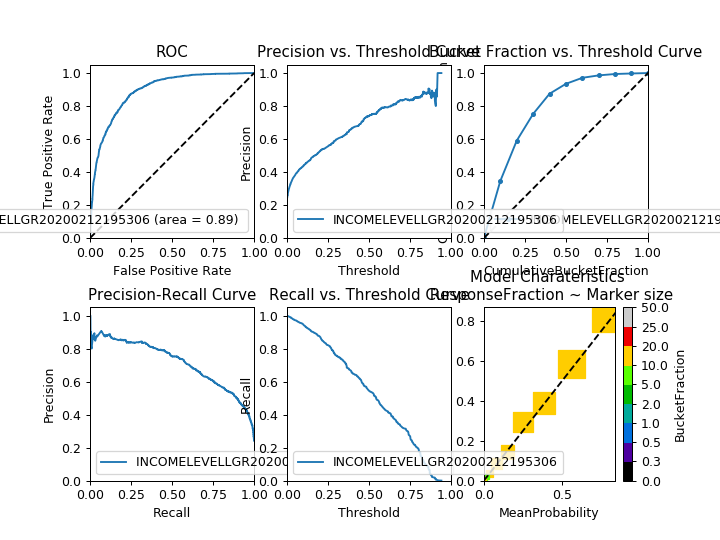

In [8]:
%matplotlib notebook
MLModelObject.plot_eval_matrics(comparison=False)

### Test Run

In [9]:
output = mltk.score_records(TestInput, MLModelObject, edges=None, ETL=ETL, variables_setup_dict=variables_setup_dict, return_type='dict') # Other options for return_type, {'json', 'frame'}

Column ID exists in the DataFrame


In [10]:
output

[{'ID': 'A001',
  'age': 32,
  'capitalgain': 0,
  'capitalloss': 0,
  'education': 'Doctorate',
  'educationnum': 16,
  'hoursperweek': 40,
  'maritalstatus': 'Married',
  'nativecountry': '?',
  'occupation': 'Prof-specialty',
  'race': 'Asian-Pac-Islander',
  'relationship': 'Husband',
  'sex': 'Male',
  'workclass': 'Private',
  'Probability': 0.6612561010199076,
  'Score': 7,
  'Predicted': 1}]

### Save Model

In [11]:
MyModelChest = mltk.ModelChest()
MyModelChest.add_model(model_key='test', model_file=None, model_object=MLModelObject, replace=False)
MyModelChest.save_model_chest()
MyModelChest.get_model_chest_json()

Required either [config_path] or [model_chest_file_path, model_folder]
Model Chest Folder set to :
C:\Users\spten\OneDrive\0-Development\08-MLToolkit\Project\MLToolkit\v0.1.11\ModelsChest
Created new Model Chest :
{
    "Folder": "*ModelsChest",
    "Models": {},
    "Default": null
}
Model Chest folder not found. New folder C:\Users\spten\OneDrive\0-Development\08-MLToolkit\Project\MLToolkit\v0.1.11\ModelsChest created.
Saving model to file C:\Users\spten\OneDrive\0-Development\08-MLToolkit\Project\MLToolkit\v0.1.11\ModelsChest\INCOMELEVELLGR20200212195306.pkl
Model "test":"INCOMELEVELLGR20200212195306.pkl" added
Model "test" set as Default
Model Chest saved to C:\Users\spten\OneDrive\0-Development\08-MLToolkit\Project\MLToolkit\v0.1.11\model_chest.json


{'Folder': '*ModelsChest',
 'Models': {'test': 'INCOMELEVELLGR20200212195306.pkl'},
 'Default': 'test'}

### Load Model

In [12]:
lodedModel = MyModelChest.get_model_object('test')
lodedModel.get_model_manifest()

Loading model from file C:\Users\spten\OneDrive\0-Development\08-MLToolkit\Project\MLToolkit\v0.1.11\ModelsChest\INCOMELEVELLGR20200212195306.pkl


{'model_attributes': {'ModelID': 'INCOMELEVELLGR20200212195306',
  'ModelType': 'classification',
  'ModelName': 'IncomeLevel',
  'Version': '0.1',
  'MLTKVersion': '0.1.11',
  'BuiltTime': '20200212195306',
  'ModelFitTime': 0.4272312000000005,
  'MLTool': 'statsmodels=0.9.0'},
 'model_parameters': {'MLAlgorithm': 'LGR',
  'MaxIterations': 100,
  'NumClasses': 2},
 'score_parameters': {'Edges': [0,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   0.6,
   0.7,
   0.8,
   0.9,
   1.0],
  'Threshold': 0.5,
  'Quantiles': 10,
  'TargetClass': '>50K',
  'ScoreVariable': 'Probability',
  'ScoreLabel': 'Score',
  'QuantileLabel': 'Quantile',
  'PredictedLabel': 'Predicted'},
 'sample_attributes': {'SampleDescription': 'Adult Census Income Dataset',
  'NumClasses': 2,
  'DataFormat': 'table',
  'ClassLabelsMap': {'<=50K': 0, '>50K': 1},
  'RecordIdentifiers': ['ID'],
  'ModelDataStats':                count unique                 top   freq        mean        std    min     10%         25%         

## Cite as
```
@misc{mltk2019,
  author =  "Sumudu Tennakoon",
  title = "MLToolKit(mltk): A Simplified Toolkit for Unifying End-To-End Machine Learing Projects",
  year = 2019,
  publisher = "GitHub",
  howpublished = {\url{https://mltoolkit.github.io/mltk/}},
  version = "0.1.11"
}
```

<hr>
This notebook and related materials were developed by Sumudu Tennakoon to demostrate the JSON-MLS usage in MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, TensorFlow, Catboost, etc.)
Create Date: July 20, 2019; Last Update: December 31, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)